In [2]:
import pandas as pd

# Reading data from a Parquet file into a DataFrame
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')

# Display the DataFrame
df.head()

,DP,VD,AF,PMEAN,PSTD,QUAL,QSTD,SBF,ODDRATIO,MQ,...,SHIFT3,MSI,MSILEN,NM,HICNT,HICOV,DUPRATE,SPLITREAD,SPANPAIR,labels
0,4.0,4.0,1.0,18.5,1.0,37.0,0.0,1.0,0.0,55.0,...,0.0,1.0,1.0,1.2,4.0,4.0,0.0,0.0,0.0,0
1,6.0,6.0,1.0,35.2,1.0,37.0,0.0,1.0,0.0,42.5,...,0.0,1.0,1.0,1.3,6.0,6.0,0.0,0.0,0.0,0
2,2.0,2.0,1.0,32.0,1.0,37.0,0.0,1.0,0.0,47.5,...,1.0,3.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0
3,2.0,2.0,1.0,56.0,1.0,37.0,0.0,1.0,0.0,58.5,...,0.0,3.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0
4,2.0,2.0,1.0,6.0,1.0,37.0,1.0,1.0,0.0,30.5,...,2.0,2.0,2.0,2.5,2.0,2.0,0.0,0.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37098646 entries, 0 to 37098645
Data columns (total 23 columns):
 #   Column     Dtype  
---  ------     -----  
 0   DP         float64
 1   VD         float64
 2   AF         float64
 3   PMEAN      float64
 4   PSTD       float64
 5   QUAL       float64
 6   QSTD       float64
 7   SBF        float64
 8   ODDRATIO   float64
 9   MQ         float64
 10  SN         float64
 11  HIAF       float64
 12  ADJAF      float64
 13  SHIFT3     float64
 14  MSI        float64
 15  MSILEN     float64
 16  NM         float64
 17  HICNT      float64
 18  HICOV      float64
 19  DUPRATE    float64
 20  SPLITREAD  float64
 21  SPANPAIR   float64
 22  labels     int64  
dtypes: float64(22), int64(1)
memory usage: 6.4 GB


In [6]:
import pandas as pd
import swifter
import io
import os
import pandas as pd
from multiprocessing import Pool
import numpy as np
from matplotlib import pyplot as plt
from random import sample
import seaborn as sns
import swifter

import sklearn as sk
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Accuracy: 0.9958
Confusion Matrix:
[[1227343   12023]
 [  19162 6161202]]


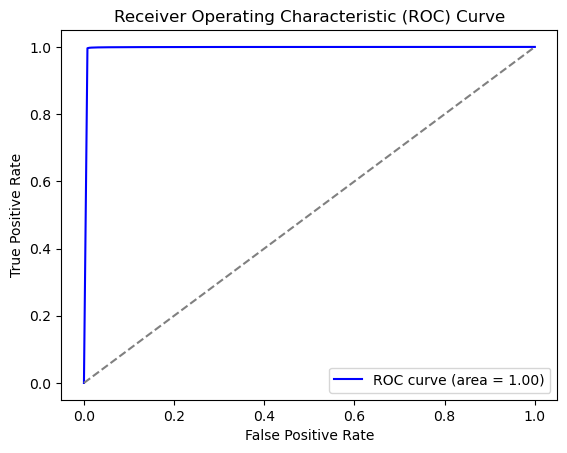

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Load the model from the pickle file
with open('/home/ndo/vardict_ML/models_output/decistion_tree_smote.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# Load the data again
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())
X = df.drop(columns=['labels'])
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# sm = SMOTE(random_state=27)
# X_test, y_test = sm.fit_resample(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9958
Confusion Matrix:
[[1227343   12023]
 [  19162 6161202]]


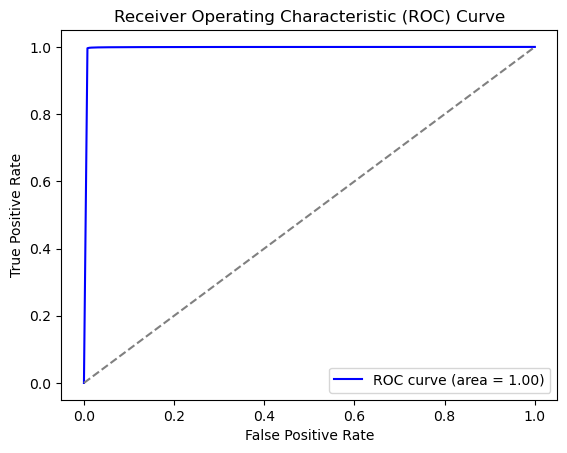

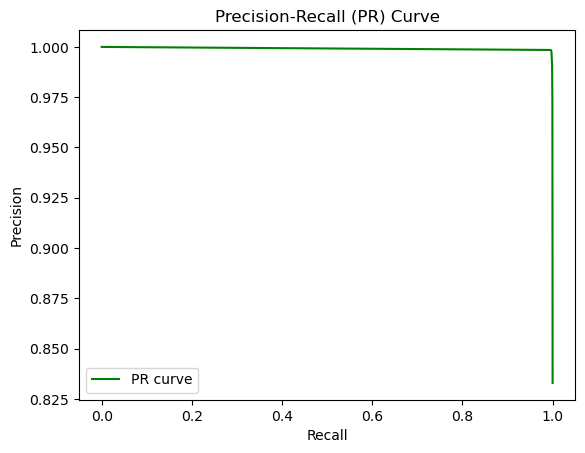

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the model from the pickle file
with open('/home/ndo/vardict_ML/models_output/decistion_tree_smote.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# Load the data again
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())
X = df.drop(columns=['labels'])
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='green', label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.show()


Accuracy: 0.9939
Confusion Matrix:
[[1851147    7134]
 [  60246 9211067]]


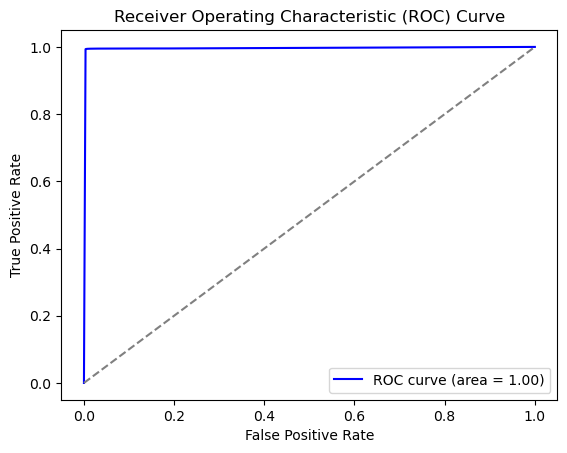

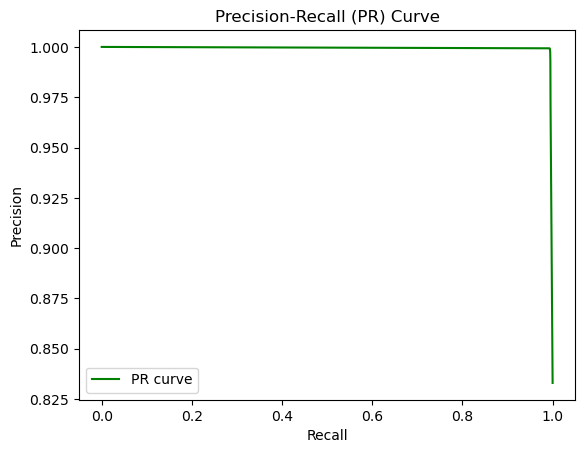

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the model from the pickle file
with open('/home/ndo/vardict_ML/models_output/decision_tree__downsampling_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# Load the data again
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())
X = df.drop(columns=['labels'])
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='green', label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.show()

labels
0    4956977
1    4956977
Name: count, dtype: int64
Finished resampling, starting to train the model


/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


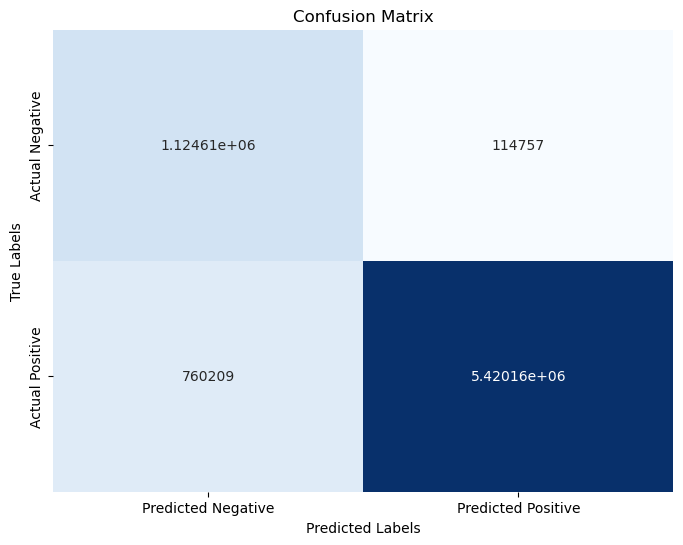

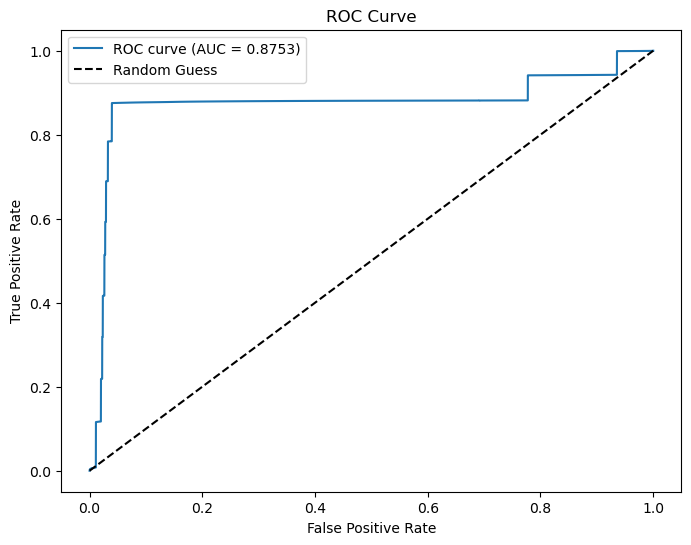

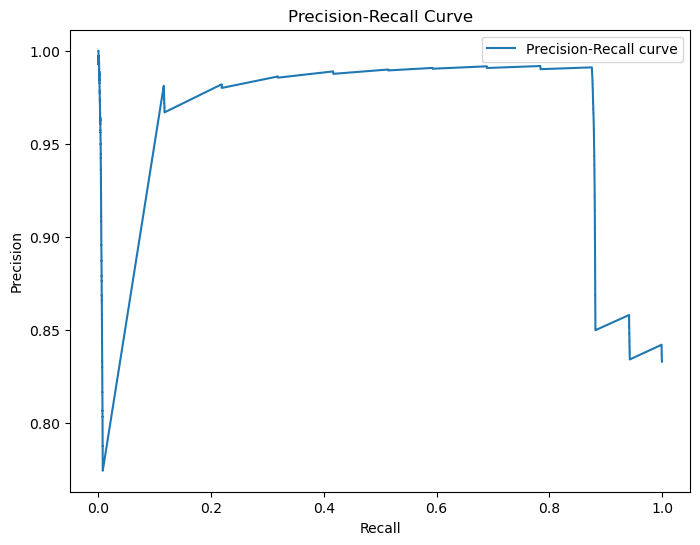

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())  # Handle missing values in column 'VD'
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Target labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
negative = train_data[train_data.labels == 0]
positive = train_data[train_data.labels == 1]

# Downsample the minority class
pos_downsampled = resample(positive,
                           replace=True,  # Sample with replacement
                           n_samples=len(negative),  # Match number in majority class
                           random_state=27)  # Reproducible results

# Combine majority and downsampled minority
downsampled = pd.concat([negative, pos_downsampled])

print(downsampled.labels.value_counts())

# Split the downsampled data into features and labels
X_train = downsampled.drop(columns=['labels'])
y_train = downsampled['labels']

print("Finished resampling, starting to train the model")

# Train a Logistic Regression model
dt_model = LogisticRegression(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# ---- PLOTTING SECTION ---- #


# Plot Confusion Matrix with Absolute Numbers
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


labels
0    4956977
1    4956977
Name: count, dtype: int64
Finished resampling, starting to train the model


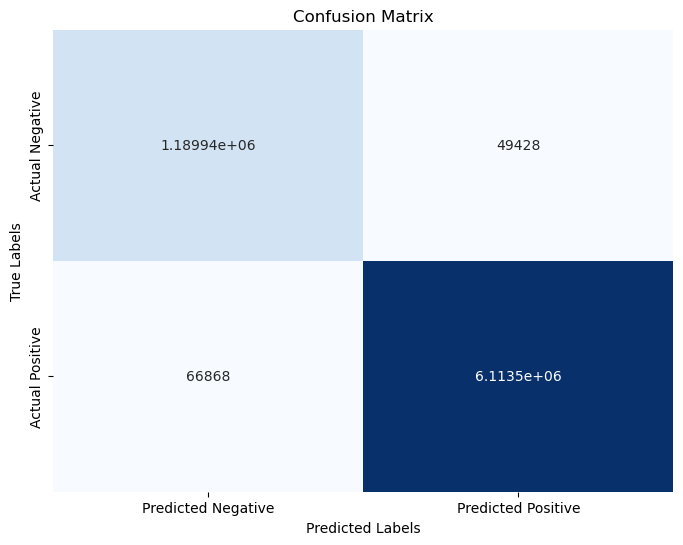

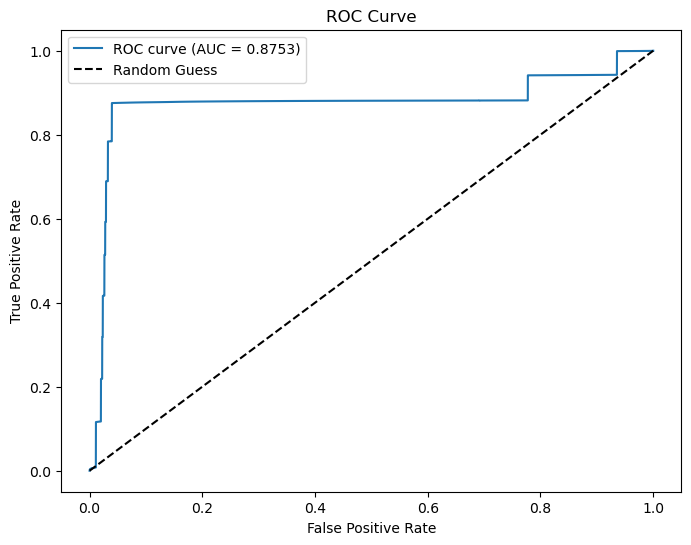

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load the data
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())  # Handle missing values in column 'VD'
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Target labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
negative = train_data[train_data.labels == 0]
positive = train_data[train_data.labels == 1]

# Downsample the minority class
pos_downsampled = resample(positive,
                           replace=True,  # Sample with replacement
                           n_samples=len(negative),  # Match number in majority class
                           random_state=27)  # Reproducible results

# Combine majority and downsampled minority
downsampled = pd.concat([negative, pos_downsampled])

print(downsampled.labels.value_counts())

# Split the downsampled data into features and labels
X_train = downsampled.drop(columns=['labels'])
y_train = downsampled['labels']

print("Finished resampling, starting to train the model")

# Train a Logistic Regression model
dt_model = SGDClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)
# y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# ---- PLOTTING SECTION ---- #


# Plot Confusion Matrix with Absolute Numbers
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

# # Plot Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc="best")
# plt.show()


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load the data
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())  # Handle missing values in column 'VD'
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Target labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
negative = train_data[train_data.labels == 0]
positive = train_data[train_data.labels == 1]

# Downsample the minority class
pos_downsampled = resample(positive,
                           replace=True,  # Sample with replacement
                           n_samples=len(negative),  # Match number in majority class
                           random_state=27)  # Reproducible results

# Combine majority and downsampled minority
downsampled = pd.concat([negative, pos_downsampled])

print(downsampled.labels.value_counts())

# Split the downsampled data into features and labels
X_train = downsampled.drop(columns=['labels'])
y_train = downsampled['labels']

print("Finished resampling, starting to train the model")

# Train a Logistic Regression model
dt_model = RandomForestClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# ---- PLOTTING SECTION ---- #


# Plot Confusion Matrix with Absolute Numbers
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


labels
0    4956977
1    4956977
Name: count, dtype: int64
Finished resampling, starting to train the model


: 

Loading data...


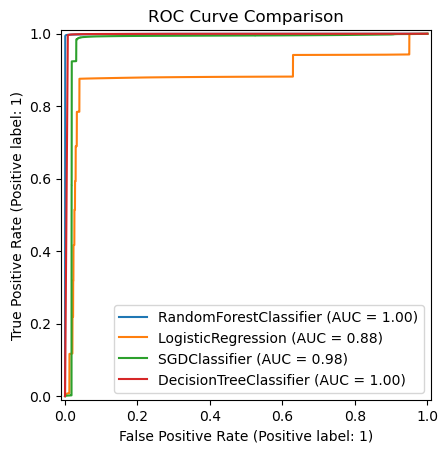

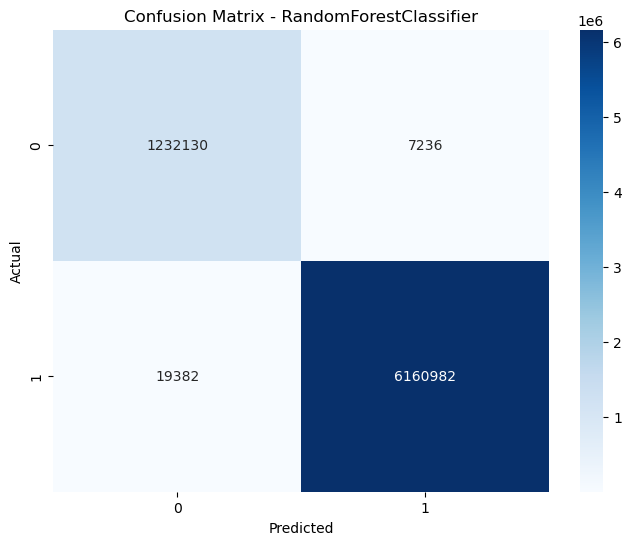

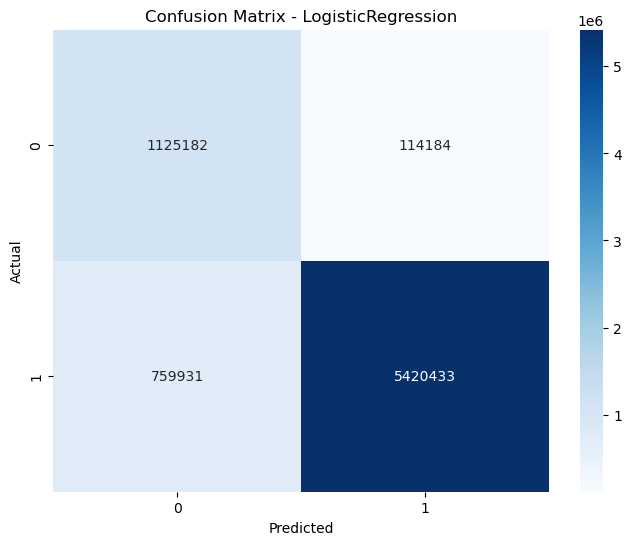

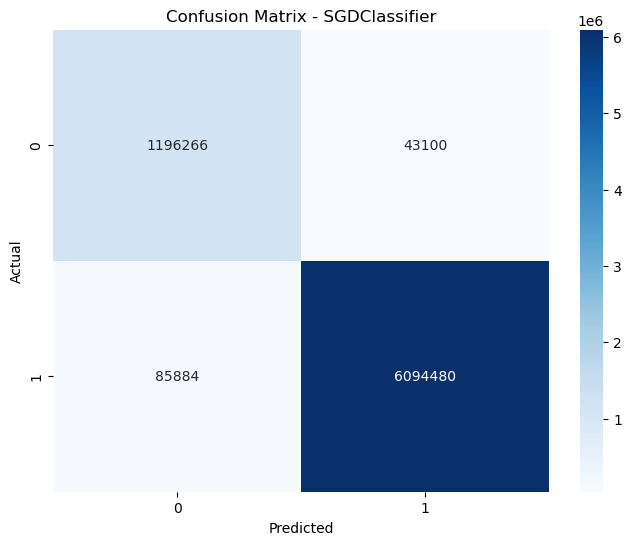

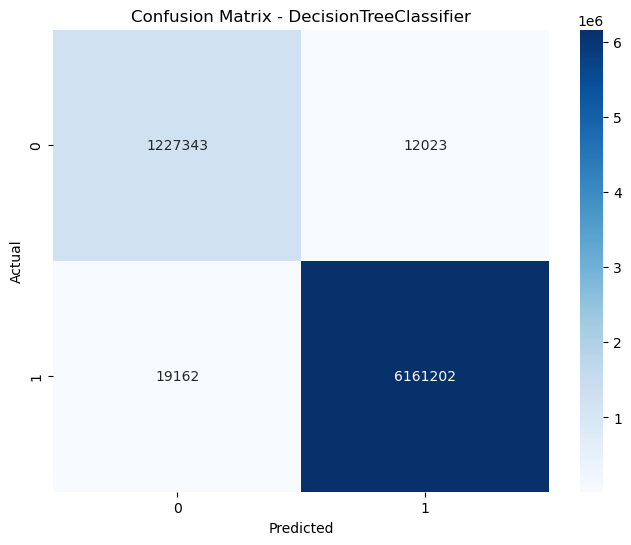

In [2]:

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Function to load model results from a pickle file
def load_model_results(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    else:
        print(f"File {file_path} not found.")
        return None

# Step 2: Load the saved models
file_path = '/home/ndo/vardict_ML/models_output/models_4_SMOTE_results.pkl'
model_results = load_model_results(file_path)

if model_results is None:
    exit()

# Step 3: Load the dataset from the same parquet file to retrieve features and labels
print("Loading data...")
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')

df['VD'] = df['VD'].fillna(df['VD'].mean())

# Features and labels
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Labels

# Train/Test Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
# sm = SMOTE(random_state=27)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# Step 4: Plot ROC curves for each saved model
fig, ax = plt.subplots()
for model_name, model_data in model_results.items():
    model = model_data['model']
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=model_name)

plt.title("ROC Curve Comparison")
plt.show()

# Step 5: Generate and display confusion matrices for each saved model
for model_name, model_data in model_results.items():
    model = model_data['model']
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
